In [158]:
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [159]:
# Global Constants
TOTAL_AF_SUPPLY = 100_000_000  # Total supply of $AF tokens
TOTAL_ALFA_SUPPLY = 60_000_000  # Total supply of ALFA points

# Burning Budgets Percentages
AF_BURNING_EMISSION_BUDGET_PERCENT = 0.05  # 5% of $AF total supply
AF_STREAM_BURNING_EMISSION_BUDGET_PERCENT = 0.90  # 90% of burning emission
AF_INSTANT_BURNING_EMISSION_BUDGET_PERCENT = 0.10  # 10% of burning emission

AF_BURNING_EMISSION_BUDGET = TOTAL_AF_SUPPLY * AF_BURNING_EMISSION_BUDGET_PERCENT

# Instant Burning Emission Budget
AF_INSTANT_BURNING_EMISSION_BUDGET = TOTAL_AF_SUPPLY * AF_BURNING_EMISSION_BUDGET_PERCENT * AF_INSTANT_BURNING_EMISSION_BUDGET_PERCENT
# Instant Burning Conversion Rate
INSTANT_BURNING_CONVERSION_RATE = AF_INSTANT_BURNING_EMISSION_BUDGET / TOTAL_ALFA_SUPPLY 

# Stream Burning Emission Budget
AF_STREAM_BURNING_EMISSION_BUDGET = TOTAL_AF_SUPPLY * AF_BURNING_EMISSION_BUDGET_PERCENT * AF_STREAM_BURNING_EMISSION_BUDGET_PERCENT
# Stream Burning Conversion Rate
STREAM_BURNING_CONVERSION_RATE = AF_STREAM_BURNING_EMISSION_BUDGET / TOTAL_ALFA_SUPPLY 


# Mining
AF_MINING_EMISSION_BUDGET_PERCENT = 0.05  # 5% of $AF total supply
AF_MINING_EMISSION_BUDGET = TOTAL_AF_SUPPLY * AF_MINING_EMISSION_BUDGET_PERCENT # Mining Emission Budget
MINING_CONVERSION_RATE = AF_MINING_EMISSION_BUDGET / (TOTAL_AF_SUPPLY - AF_MINING_EMISSION_BUDGET) # Mining Conversion Rate


In [160]:
# AlfaBurningProgram Class
class AlfaBurningProgram:
    def __init__(self):
        self.burners = {}  # Store burner info
        self.instant_burn_emission = 0
        self.stream_burn_emission = 0

    def burn(self, burner, burn_amount, is_instant):
        if is_instant:
            self.instant_burn(burner, burn_amount)
        else:
            self.stream_burn(burner, burn_amount)

    def instant_burn(self, burner, burn_amount):
        # stop burning if total supply of ALFA is burnt
        if self.aggregate_burns() > TOTAL_ALFA_SUPPLY:
            return
        
        # stop burning if instant burning emission budget is distributed
        if self.instant_burn_emission > AF_INSTANT_BURNING_EMISSION_BUDGET:
            return
        
        emission = EmissionRegulator.calculate_instant_burn_emission(burn_amount)

        self.burners[burner] = {
            'burnt_amount': burn_amount,
            'annualized_emission': emission
        }

        self.instant_burn_emission += emission

    def stream_burn(self, burner, burn_amount):
        # stop burning if total supply of ALFA is burnt
        if self.aggregate_burns() > TOTAL_ALFA_SUPPLY:
            return
        
        # stop burning if stream burning emission budget is distributed
        if self.stream_burn_emission > AF_STREAM_BURNING_EMISSION_BUDGET:
            return
        
        emission = EmissionRegulator.calculate_stream_burn_emission(burn_amount)

        self.burners[burner] = {
            'burnt_amount': burn_amount,
            'annualized_emission': emission
        }

        self.stream_burn_emission += emission

    def aggregate_burns(self):
        total_burned = sum(burner_info['burnt_amount'] for burner_info in self.burners.values())
        return total_burned
    
    def aggregate_emission(self):
        return sum(burner_info['annualized_emission'] for burner_info in self.burners.values())
    

# LiquidityMiningProgram Class
class LiquidityMiningProgram:
    def __init__(self):
        self.miners = {}  # Store burner info

    def add_liquidity(self, miner, af_amount_deposited, lock_period_days):
        if self.aggregate_liquidity() > TOTAL_AF_SUPPLY:
            return
        
        if self.aggregate_emission() > AF_MINING_EMISSION_BUDGET:
            return
    
        current_time = datetime.now()
        self.miners[miner] = {
            'af_amount_deposited': af_amount_deposited,
            'lock_period': lock_period_days,
            'lock_started_at': current_time,
            'emission': EmissionRegulator.calculate_liquidity_emission(af_amount_deposited, lock_period_days)
        }

    def aggregate_liquidity(self):
        total_deposited = sum(miner_info['af_amount_deposited'] for miner_info in self.miners.values())
        return total_deposited
    
    def aggregate_emission(self):
        return sum(miner_info['emission'] for miner_info in self.miners.values())
    

# EmissionRegulator Class
class EmissionRegulator:

    def calculate_instant_burn_emission(burn_amount):
        return burn_amount * INSTANT_BURNING_CONVERSION_RATE
    
    def calculate_stream_burn_emission(burn_amount):
        return burn_amount * STREAM_BURNING_CONVERSION_RATE
    

    def calculate_liquidity_emission(af_amount_deposited, lock_period_days):
        discount_factor = 1 / (1 - lock_period_days / 366)  # Simple discount factor
        return af_amount_deposited * MINING_CONVERSION_RATE * discount_factor
    

In [161]:

# Initialize Programs
alfa_burning_program = AlfaBurningProgram()
liquidity_mining_program = LiquidityMiningProgram()
emission_regulator = EmissionRegulator()


In [162]:
# Output Observability functions

# Plotting burning emissions over time
def plot_output(timestamps, burning_emissions, mining_emissions):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, burning_emissions, linestyle='-', color='b', label='Cumulative Burning Emission Over Time')
    plt.plot(timestamps, mining_emissions, linestyle='-', color='r', label='Cumulative Mining Emission Over Time')
    plt.xlabel('Time')
    plt.ylabel('AF Emission')
    plt.title('AF Reward Emission Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotting burning emissions over time
def plot_burning_output(timestamps, burning_emissions, instant_emissions_over_time, stream_emissions_over_time):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, burning_emissions, linestyle='-', color='b', label='Cumulative Burning Emission Over Time')
    plt.plot(timestamps, instant_emissions_over_time, linestyle='-', color='r', label='Cumulative Instant Burning Emission Over Time')
    plt.plot(timestamps, stream_emissions_over_time, linestyle='-', color='g', label='Cumulative Stream Burning Emission Over Time')
    plt.xlabel('Time')
    plt.ylabel('AF Emission')
    plt.title('AF Burning Reward Emission Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotting Circulating supply function over time
def plot_alfa_supply_output(timestamps, alfa_supply):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, alfa_supply, linestyle='-', color='g', label='ALFA Supply')
    plt.xlabel('Time')
    plt.ylabel('Circulating ALFA Supply')
    plt.title('ALFA Supply Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plotting Circulating supply function over time
def plot_af_deposited_output(timestamps, af_deposited):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamps, af_deposited, linestyle='-', color='g', label='AF Deposited Over Time')
    plt.xlabel('Time')
    plt.ylabel('AF Deposited')
    plt.title('AF Deposited Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

# Print Average
def calculateAverage(lst): 
    return sum(lst) / len(lst)


In [163]:
# Scenario generation function

# Burning
def generate_burning_scenarios(alfa_burn_program, num_burn_events, max_burn_amount, total_days):
    # Initialize the scenario results
    alfa_supply_over_time = []
    emissions_over_time = []
    instant_emissions_over_time = []
    stream_emissions_over_time = []
    timestamps = []
    
    # Define start time
    start_time = datetime.today()

    for i in range(num_burn_events):
        # Generate random burn data
        burner_name = f"burner_{i + 1}"
        # burn_amount = 6000
        burn_amount = random.randint(10, max_burn_amount)  # Random burn amount
        # is_instant = False
        is_instant = bool(random.getrandbits(1))

        # Apply the burn event
        alfa_burn_program.burn(burner_name, burn_amount, is_instant)

        # Record the total emission and timestamp after the burn
        # current_time = start_time + timedelta(days=(i * total_days))
        current_time = start_time + timedelta(days=(i * total_days / num_burn_events))
        timestamps.append(current_time)
        emissions_over_time.append(alfa_burn_program.aggregate_emission())
        instant_emissions_over_time.append(alfa_burn_program.instant_burn_emission)
        stream_emissions_over_time.append(alfa_burn_program.stream_burn_emission)
        alfa_supply_over_time.append(TOTAL_ALFA_SUPPLY - alfa_burn_program.aggregate_burns())


    return timestamps, emissions_over_time, instant_emissions_over_time, stream_emissions_over_time, alfa_supply_over_time


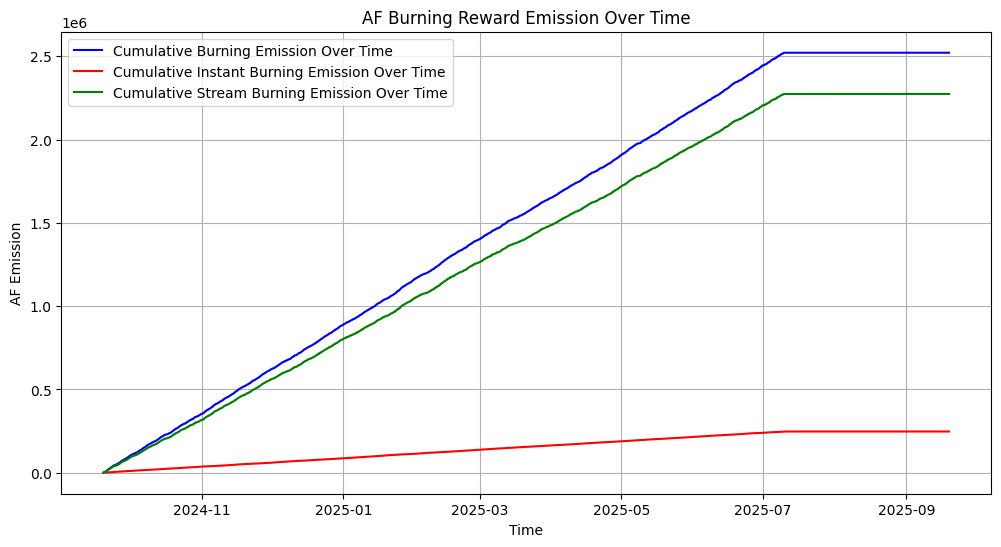

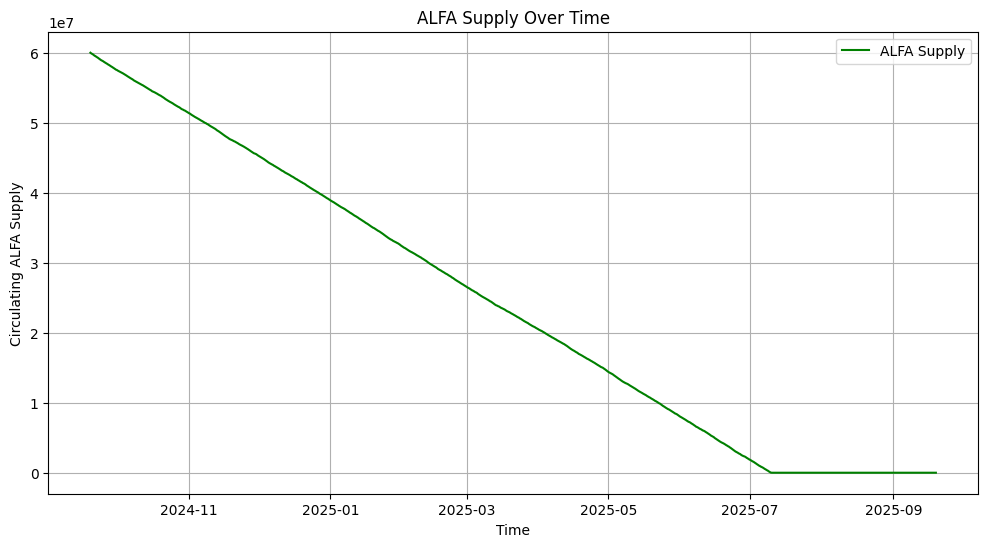

In [164]:
# Scenario Variables :
num_burn_events=10000

max_burn_amount=15000

total_days=365

# Generate scenarios
timestamps, burning_emissions, instant_emissions_over_time, stream_emissions_over_time, alfa_supply = generate_burning_scenarios(alfa_burning_program, num_burn_events, max_burn_amount, total_days)

# Plot emissions over time
plot_burning_output(timestamps, burning_emissions, instant_emissions_over_time, stream_emissions_over_time)
plot_alfa_supply_output(timestamps, alfa_supply)

